In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import torch
import torch.nn as nn


In [127]:
path = '/Users/iamyoungjin/Desktop/Nottingham Modules/Term1/ML/Assignment2/TrainDataset2023.xls'
df = pd.read_excel(path)
df = df.drop('ID', axis=1)

In [128]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 119 entries, pCR (outcome) to original_ngtdm_Strength
dtypes: float64(108), int64(11)
memory usage: 372.0 KB
None
       pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean       12.697500                      56.000208   51.804674    0.547500   
std       111.107417                      27.137584   10.948522    0.498362   
min         0.000000                       0.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.516769    0.000000   
50%         0.000000                      55.000000   51.019507    1.000000   
75%         0.000000                      73.000000   60.000000    1.000000   
max       999.000000                     144.000000   79.603012    1.000000   

              PgR        HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.00000

In [129]:
df

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.000000,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.000000,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.000000,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.000000,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.000000,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,54.500000,58.5,1,0,1,0,3,2,1,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,0,49.250000,34.3,0,0,0,1,3,3,1,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,0,48.500000,53.3,0,0,0,1,2,1,1,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,0,47.500000,68.8,1,0,0,0,3,3,1,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


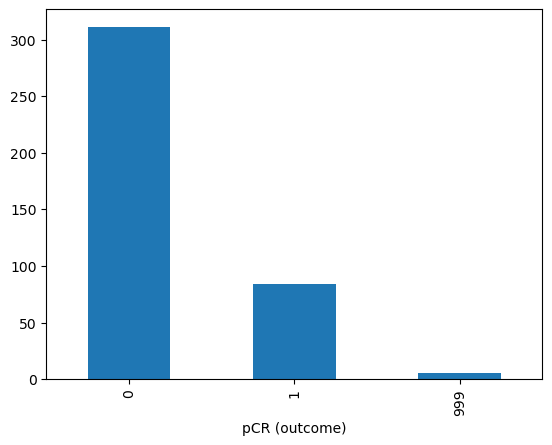

In [130]:
df['pCR (outcome)'].value_counts().plot(kind='bar')
plt.show()

### Handling missing values

In [131]:
# change "999" to NaN
df.replace(999, pd.NA, inplace=True)

# Finding missing value 
columns_with_missing_values = df.columns[df.isnull().any()]
print("Columns which has missing values:", columns_with_missing_values)

Columns which has missing values: Index(['pCR (outcome)', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade',
       'Proliferation', 'HistologyType', 'LNStatus'],
      dtype='object')


In [132]:
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

for column, value in missing_data.items():
    if value != 0:
        print(f"colum:{column}, {missing_data[column]}")
        print(f"colum:{column}, {missing_percentage[column]}%")

colum:pCR (outcome), 5
colum:pCR (outcome), 1.25%
colum:PgR, 1
colum:PgR, 0.25%
colum:HER2, 1
colum:HER2, 0.25%
colum:TrippleNegative, 1
colum:TrippleNegative, 0.25%
colum:ChemoGrade, 3
colum:ChemoGrade, 0.75%
colum:Proliferation, 2
colum:Proliferation, 0.5%
colum:HistologyType, 3
colum:HistologyType, 0.75%
colum:LNStatus, 1
colum:LNStatus, 0.25%


In [133]:
missing_data = df.isnull().sum()
df = df.dropna()

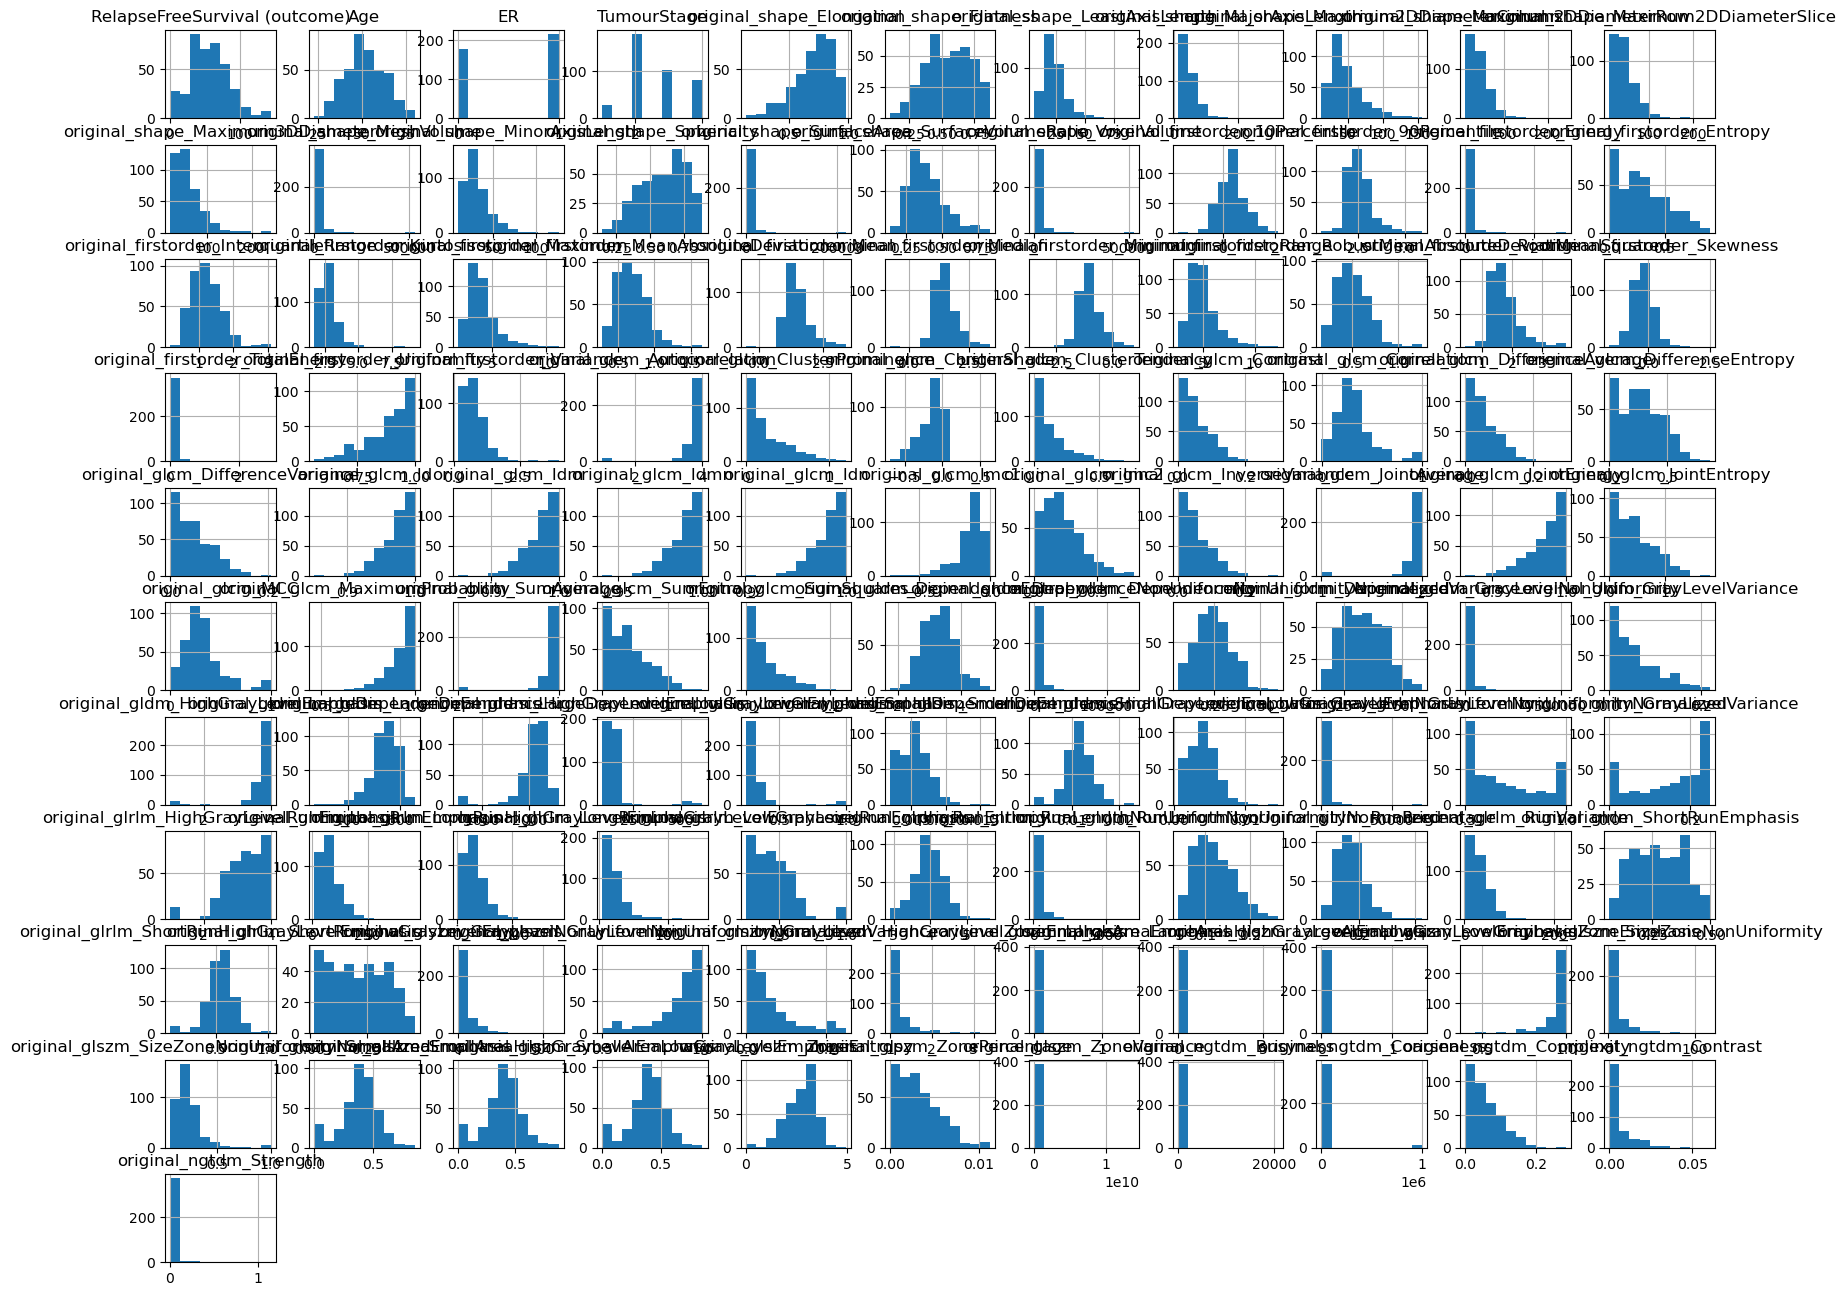

In [92]:
#check the distribution of each columns
df.hist(figsize=(20,16))
plt.show()

### Unbalnaced labels

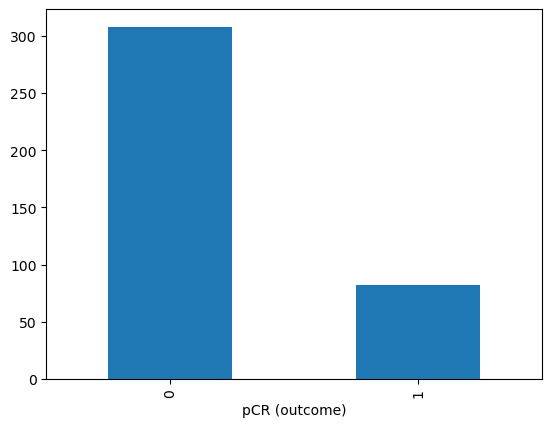

In [93]:
df['pCR (outcome)'].value_counts().plot(kind='bar')
plt.show()

### Normalisation
- Ordinal Variable : Label Encoder(3)(ChemoGrade, Proliferation, TumourStage)   
- Binary Variables: One-hot Encoder(6)(ER,PgR,HER2,TrippleNegative,HistologyType,LNStatus)   
- The others : MinMax Scaler   

In [94]:
pCR_label = df['pCR (outcome)'] # Classlification Label
RelapseFreeSurvival_label = df['RelapseFreeSurvival (outcome)'] # Regression Label
df = df.drop(['pCR (outcome)', 'RelapseFreeSurvival (outcome)'], axis=1)

In [95]:
df

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [96]:
missing_data = df.isnull().sum()
print("thenumber of missing value:")
print(missing_data)

thenumber of missing value:
Age                          0
ER                           0
PgR                          0
HER2                         0
TrippleNegative              0
                            ..
original_ngtdm_Busyness      0
original_ngtdm_Coarseness    0
original_ngtdm_Complexity    0
original_ngtdm_Contrast      0
original_ngtdm_Strength      0
Length: 117, dtype: int64


In [97]:
df

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [98]:
columns_minmax_encode = ['Age'] + df.columns[10:].tolist()
columns_onehot_encode = df.columns[1:5].tolist() + df.columns[7:9].tolist()
columns_label_encode = df.columns[5:7].tolist() + [df.columns[9]]

# Min-Max Scaling 
scaler = MinMaxScaler()
df[columns_minmax_encode] = scaler.fit_transform(df[columns_minmax_encode])

# One-Hot Encoding
df = pd.get_dummies(df, columns=columns_onehot_encode)

# Label Encoding
label_encoder = LabelEncoder()
for col in columns_label_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [99]:
df

,Age,ChemoGrade,Proliferation,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,PgR_0,PgR_1,HER2_0,HER2_1,TrippleNegative_0,TrippleNegative_1,HistologyType_1,HistologyType_2,LNStatus_0,LNStatus_1
0,0.318004,2,2,1,0.797297,0.807835,0.210203,0.064814,0.177801,0.111986,...,True,False,True,False,False,True,True,False,False,True
1,0.282670,2,2,1,0.622626,0.487408,0.174967,0.098719,0.277216,0.125706,...,False,True,True,False,True,False,True,False,False,True
2,0.141335,1,0,1,0.597765,0.640311,0.185818,0.076236,0.144991,0.119956,...,True,False,True,False,False,True,True,False,True,False
3,0.212003,2,2,2,0.746394,0.519793,0.242475,0.129083,0.381256,0.139637,...,True,False,True,False,False,True,True,False,False,True
4,0.671342,1,0,1,0.852989,0.841683,0.171992,0.047070,0.146778,0.076833,...,True,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.627175,2,1,3,0.295630,0.222072,0.097730,0.124656,0.250212,0.045014,...,True,False,False,True,True,False,True,False,False,True
396,0.199636,2,2,1,0.917529,0.811094,0.150243,0.041609,0.131280,0.072839,...,True,False,True,False,False,True,True,False,True,False
397,0.535307,1,0,1,0.612128,0.449973,0.033609,0.020185,0.034485,0.015777,...,True,False,True,False,False,True,True,False,True,False
398,0.809144,2,2,2,0.887548,0.954371,0.298907,0.079991,0.208189,0.134006,...,True,False,True,False,True,False,True,False,False,True


In [100]:
df = pd.concat([df, pCR_label], axis=1)
df = pd.concat([df, RelapseFreeSurvival_label], axis=1)
df

,Age,ChemoGrade,Proliferation,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,...,HER2_0,HER2_1,TrippleNegative_0,TrippleNegative_1,HistologyType_1,HistologyType_2,LNStatus_0,LNStatus_1,pCR (outcome),RelapseFreeSurvival (outcome)
0,0.318004,2,2,1,0.797297,0.807835,0.210203,0.064814,0.177801,0.111986,...,True,False,False,True,True,False,False,True,1,144.000000
1,0.282670,2,2,1,0.622626,0.487408,0.174967,0.098719,0.277216,0.125706,...,True,False,True,False,True,False,False,True,0,142.000000
2,0.141335,1,0,1,0.597765,0.640311,0.185818,0.076236,0.144991,0.119956,...,True,False,False,True,True,False,True,False,1,135.000000
3,0.212003,2,2,2,0.746394,0.519793,0.242475,0.129083,0.381256,0.139637,...,True,False,False,True,True,False,False,True,0,12.000000
4,0.671342,1,0,1,0.852989,0.841683,0.171992,0.047070,0.146778,0.076833,...,True,False,True,False,True,False,True,False,0,109.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.627175,2,1,3,0.295630,0.222072,0.097730,0.124656,0.250212,0.045014,...,False,True,True,False,True,False,False,True,0,54.500000
396,0.199636,2,2,1,0.917529,0.811094,0.150243,0.041609,0.131280,0.072839,...,True,False,False,True,True,False,True,False,0,49.250000
397,0.535307,1,0,1,0.612128,0.449973,0.033609,0.020185,0.034485,0.015777,...,True,False,False,True,True,False,True,False,0,48.500000
398,0.809144,2,2,2,0.887548,0.954371,0.298907,0.079991,0.208189,0.134006,...,True,False,True,False,True,False,False,True,0,47.500000


In [101]:
total_nan_count = df.isnull().sum().sum()
total_nan_count

0

#### Analysis Correlation

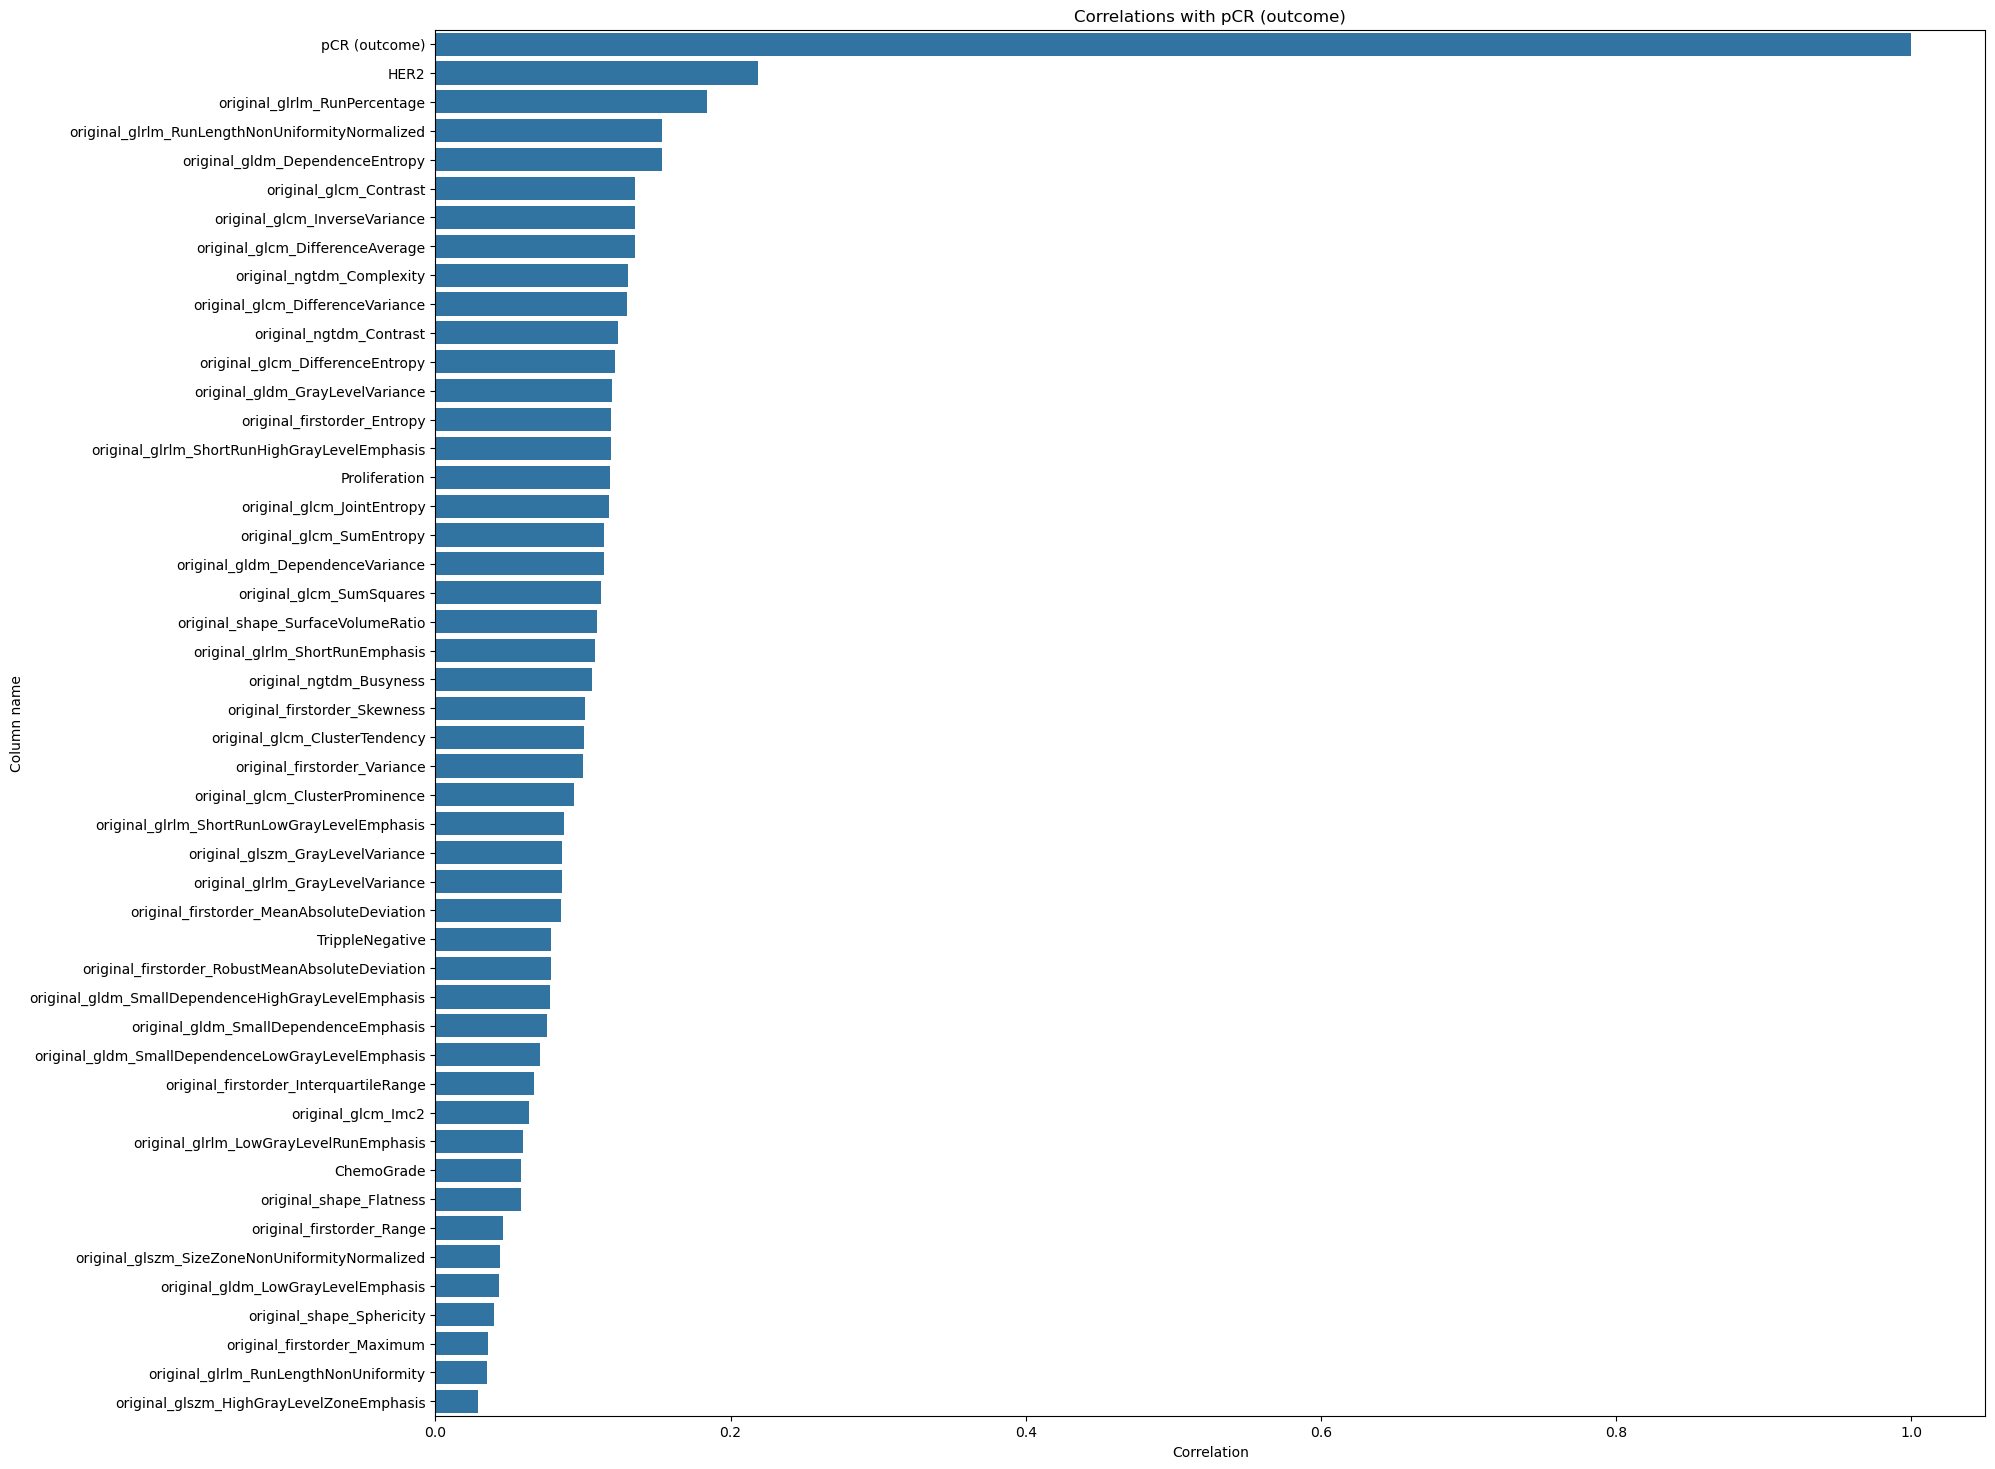

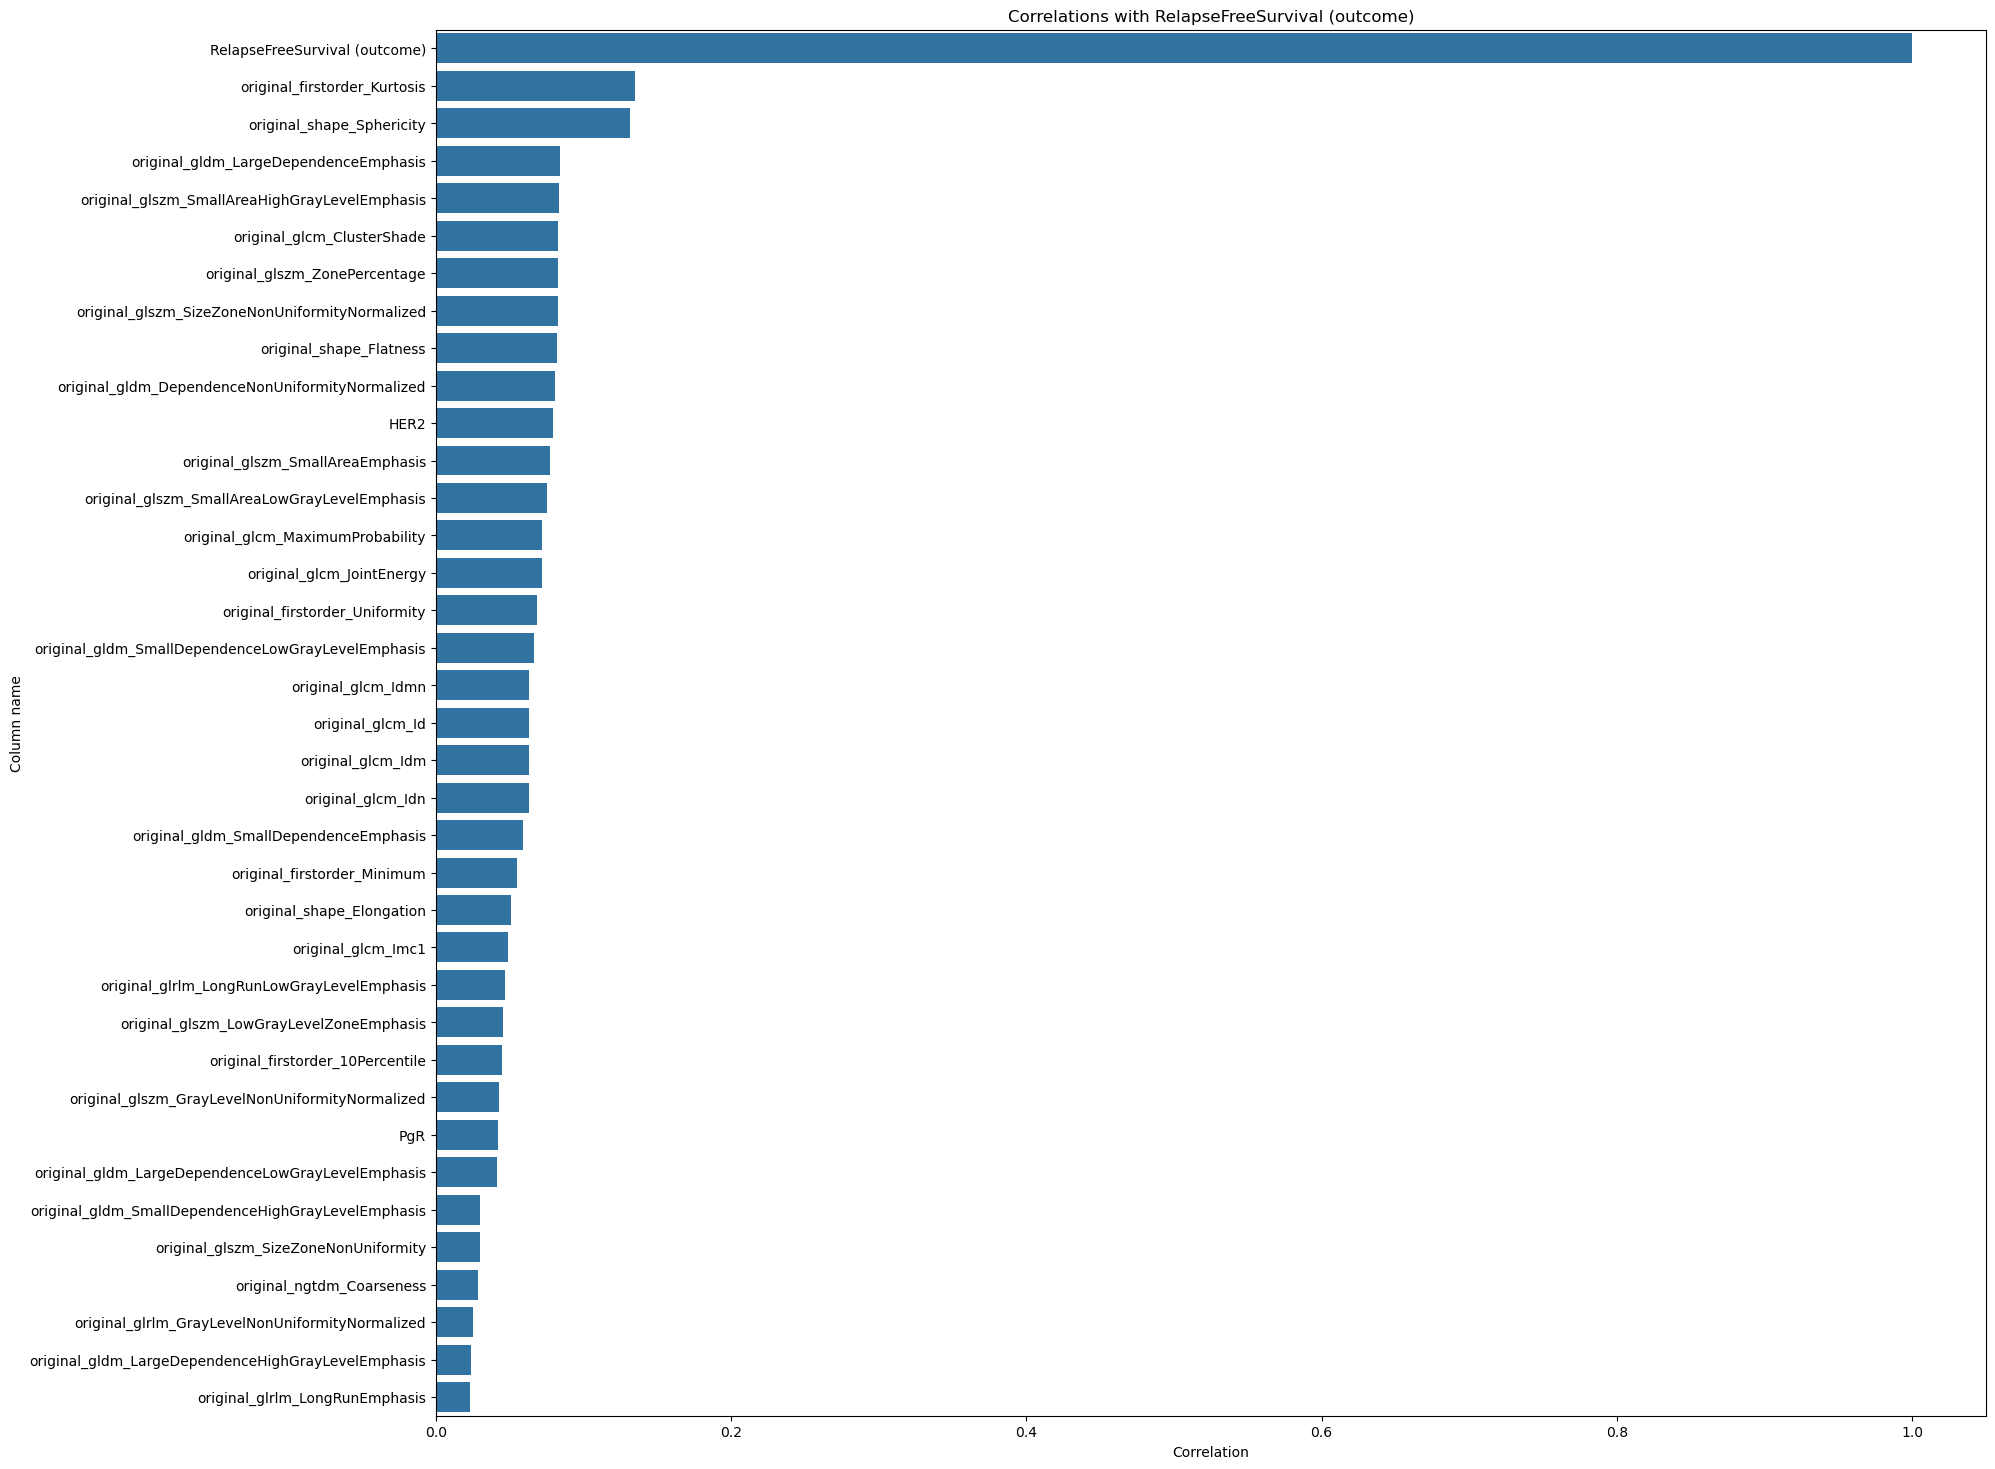

In [134]:
target = ['pCR (outcome)', 'RelapseFreeSurvival (outcome)' ]
high_correlation_lst = []
for idx in range(len(target)):
    correlation_matrix = df.corr()
    
    threshold = 0.02
    high_correlation_columns = correlation_matrix[target[idx]][correlation_matrix[target[idx]] >= threshold].index
    high_correlation_lst.append(high_correlation_columns)
    
    high_correlation_matrix = df[high_correlation_columns].corr()
    order = high_correlation_matrix.loc[target[idx]].sort_values(ascending=False).index

    plt.figure(figsize=(20, 18))
    sns.barplot(x=high_correlation_matrix.loc[target[idx]].loc[order].values, y=order)
    plt.title(f'Correlations with {target[idx]}')
    plt.xlabel('Correlation')
    plt.ylabel('Column name')
    plt.show()


#### There is a multicollinearity problem since there are many columns and correlations to label are too low.


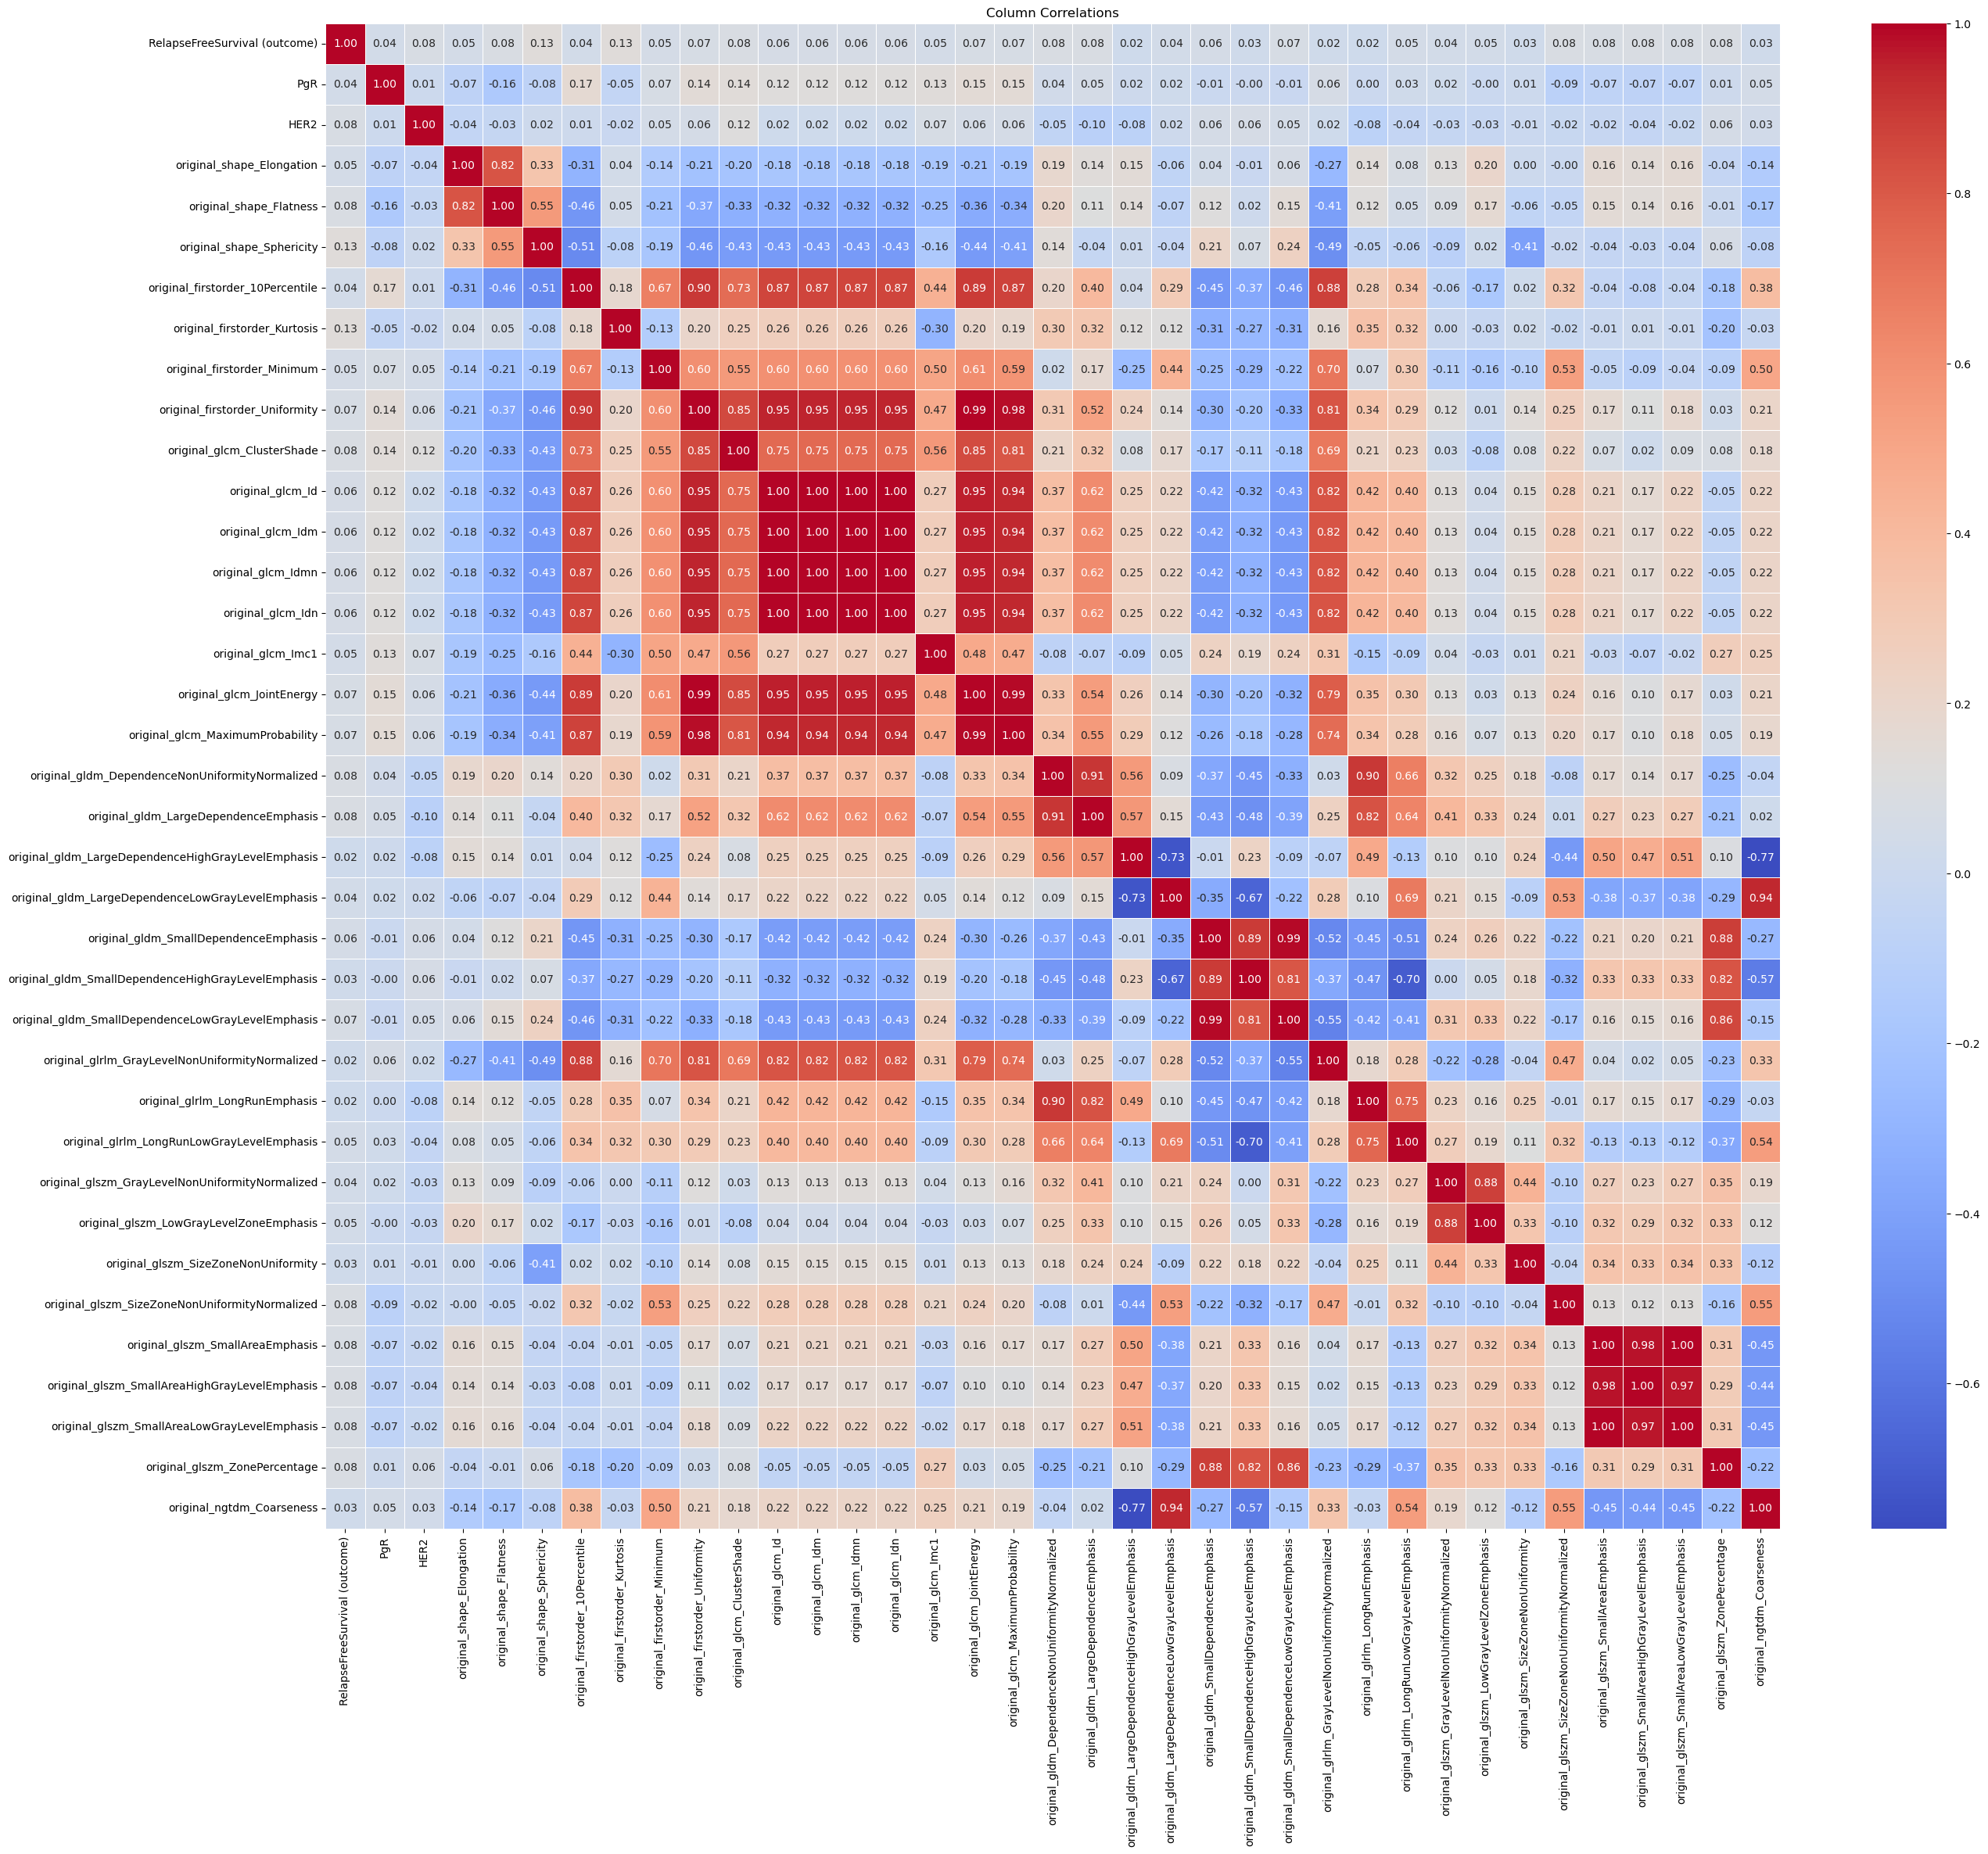

In [135]:
#### Check the multicoollinearity columns
high_correlation_matrix = df[high_correlation_columns].corr()
plt.figure(figsize=(30, 25))
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Column Correlations')
plt.show()

In [114]:
high_correlation_lst

[Index(['ChemoGrade', 'Proliferation', 'original_shape_Flatness',
        'original_shape_Sphericity', 'original_shape_SurfaceVolumeRatio',
        'original_firstorder_Entropy', 'original_firstorder_InterquartileRange',
        'original_firstorder_Maximum',
        'original_firstorder_MeanAbsoluteDeviation',
        'original_firstorder_Range',
        'original_firstorder_RobustMeanAbsoluteDeviation',
        'original_firstorder_Skewness', 'original_firstorder_Variance',
        'original_glcm_ClusterProminence', 'original_glcm_ClusterTendency',
        'original_glcm_Contrast', 'original_glcm_DifferenceAverage',
        'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance',
        'original_glcm_Imc2', 'original_glcm_InverseVariance',
        'original_glcm_JointEntropy', 'original_glcm_SumEntropy',
        'original_glcm_SumSquares', 'original_gldm_DependenceEntropy',
        'original_gldm_DependenceVariance', 'original_gldm_GrayLevelVariance',
        'origina

### Reduction of Dimension

on Working with hadnling multicollinearity

In [112]:
#TODO:
# PCA or handling multicollinearilty manually

### Model

In [105]:
test_path  = '/Users/iamyoungjin/Desktop/Nottingham Modules/Term1/ML/Assignment2/TestDatasetExample.xls'
test_df = pd.read_excel(test_path)
test_df= test_df.drop('ID', axis=1)
test_df

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,56.881588,0,0,0,1,3,3,999,0,2,...,0.194591,0.194591,2.846439,0.001281,4.168474e+06,131.044541,0.002335,0.109755,0.013383,0.002051
1,60.000000,0,0,1,0,2,1,1,0,3,...,0.309999,0.309996,2.975317,0.007253,1.736585e+05,23.967478,0.011285,0.055890,0.003163,0.009553
2,58.234086,0,0,0,1,3,3,1,1,4,...,0.328377,0.328377,3.785966,0.003185,3.607821e+06,223.279556,0.001334,0.101628,0.010844,0.001194


In [106]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x